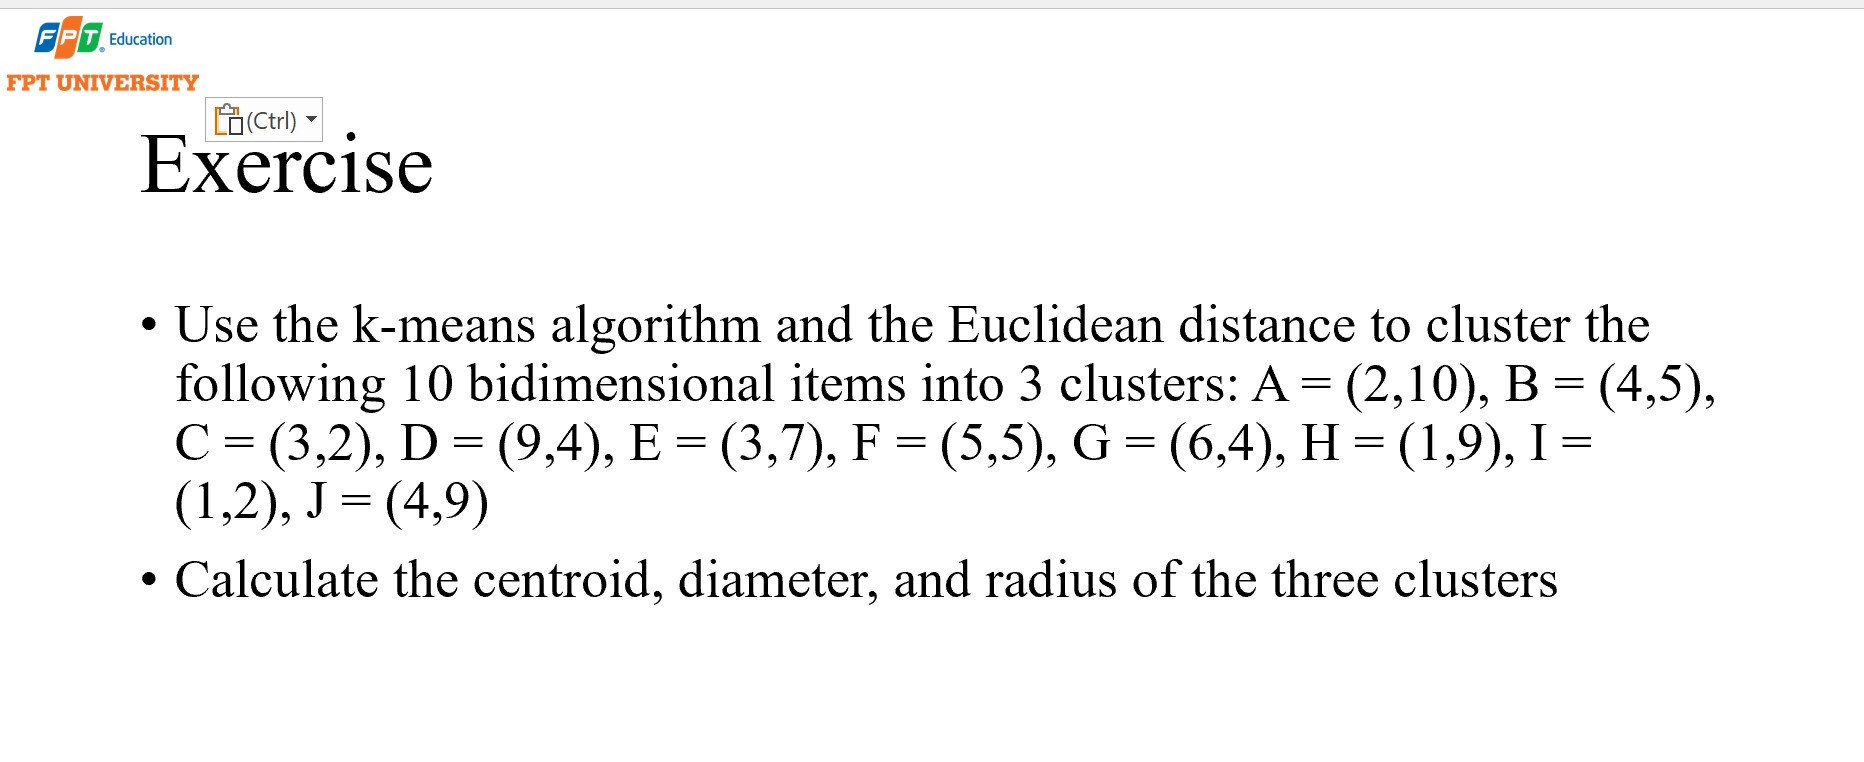

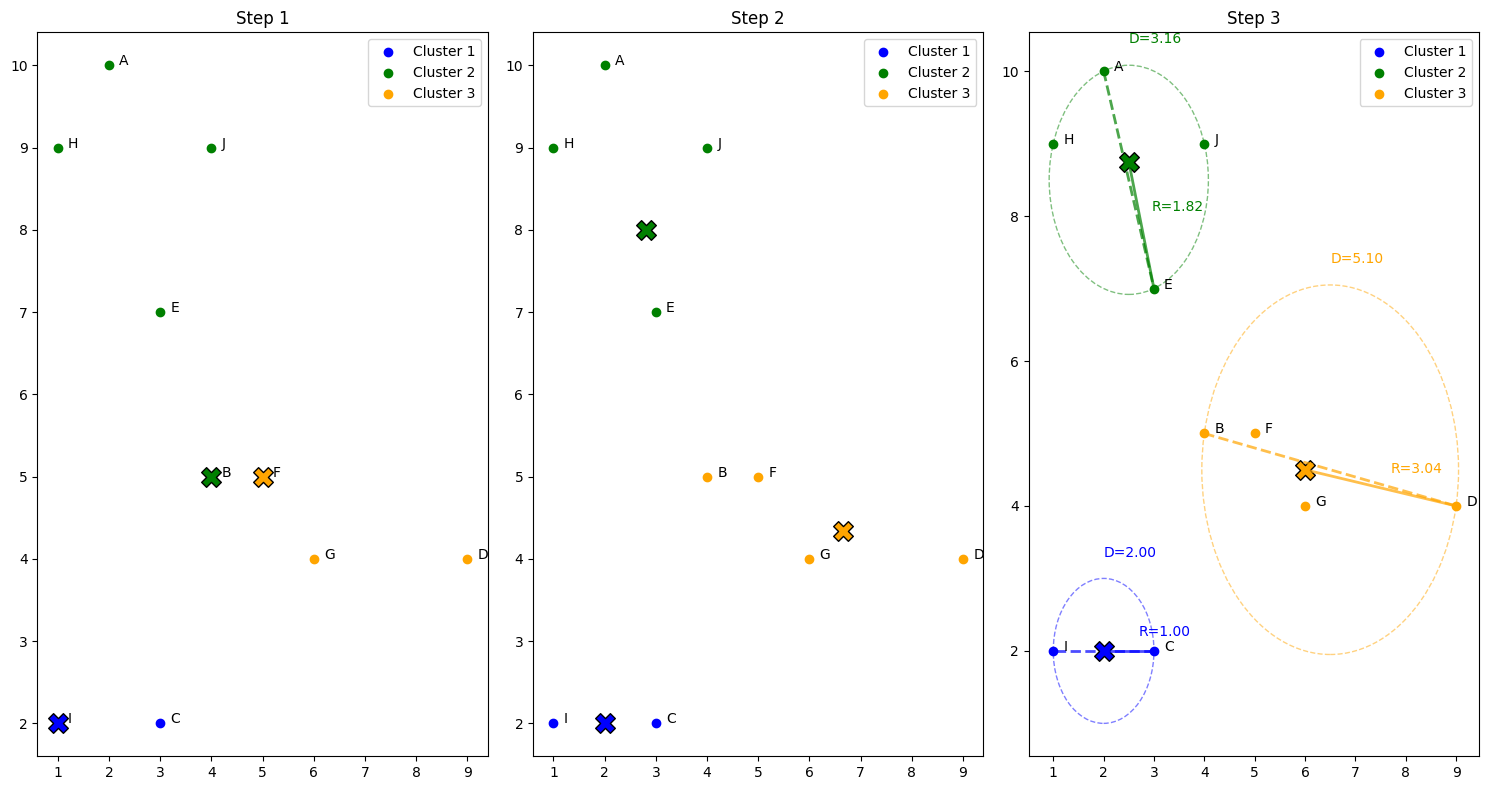

Thông tin các cụm sau khi hội tụ:

Cluster 1:
 - Centroid: (2.00, 2.00)
 - Số điểm: 2
 - Diameter: 2.00
 - Radius: 1.00
 - Điểm trong cụm: C, I

Cluster 2:
 - Centroid: (2.50, 8.75)
 - Số điểm: 4
 - Diameter: 3.16
 - Radius: 1.82
 - Điểm trong cụm: A, E, H, J

Cluster 3:
 - Centroid: (6.00, 4.50)
 - Số điểm: 4
 - Diameter: 5.10
 - Radius: 3.04
 - Điểm trong cụm: B, D, F, G


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from matplotlib.patches import Circle

# Dữ liệu các điểm
points = np.array([
    [2, 10], [4, 5], [3, 2], [9, 4], [3, 7], 
    [5, 5], [6, 4], [1, 9], [1, 2], [4, 9]
])
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
colors = ['blue', 'green', 'orange']  # Màu cho từng cụm

# Khởi tạo ngẫu nhiên các centroid ban đầu
np.random.seed(42)
centroids = points[np.random.choice(points.shape[0], 3, replace=False)]

# Hàm tính khoảng cách Euclidean
def euclidean_dist(a, b):
    return np.sqrt(np.sum((a - b) ** 2, axis=1))

# Lưu lại từng bước
steps = []

# K-Means thủ công
for step in range(100):
    # Gán điểm vào cụm gần nhất
    distances = np.array([euclidean_dist(points, centroid) for centroid in centroids]).T
    clusters = np.argmin(distances, axis=1)
    
    # Lưu lại bước
    steps.append((centroids.copy(), clusters.copy()))
    
    # Cập nhật centroid
    new_centroids = np.array([points[clusters == i].mean(axis=0) if len(points[clusters == i]) > 0 else centroids[i] for i in range(3)])
    
    # Nếu centroid không đổi nữa thì dừng
    if np.all(centroids == new_centroids):
        break
    centroids = new_centroids

# Vẽ quá trình phân cụm
num_steps = len(steps)  # Số bước thực tế
fig, axes = plt.subplots(1, num_steps, figsize=(5 * num_steps, 8))
if num_steps == 1:  # Nếu chỉ có 1 bước, axes sẽ không phải là mảng
    axes = [axes]

# Chỉ tính radius và diameter cho bước cuối cùng
final_centroids, final_clusters = steps[-1]
radii = []
diameters = []
diameter_points = []
radius_points = []

for i in range(3):
    cluster_points = points[final_clusters == i]
    if len(cluster_points) > 0:
        # Diameter: Khoảng cách lớn nhất giữa hai điểm trong cụm
        distances = cdist(cluster_points, cluster_points, metric='euclidean')
        if distances.size > 0:  # Đảm bảo ma trận khoảng cách không rỗng
            diameter = np.max(distances)
            # Tìm hai điểm tạo nên diameter
            max_idx = np.unravel_index(np.argmax(distances), distances.shape)
            d_point1 = cluster_points[max_idx[0]]
            d_point2 = cluster_points[max_idx[1]]
        else:
            diameter = 0
            d_point1 = centroids[i]
            d_point2 = centroids[i]
            
        diameters.append(diameter)
        diameter_points.append((d_point1, d_point2))
        
        # Radius: Khoảng cách xa nhất từ centroid đến một điểm trong cụm
        centroid_distances = cdist([centroids[i]], cluster_points, metric='euclidean')[0]
        radius = np.max(centroid_distances) if centroid_distances.size > 0 else 0
        radius_point_idx = np.argmax(centroid_distances) if centroid_distances.size > 0 else 0
        radius_point = cluster_points[radius_point_idx] if centroid_distances.size > 0 else centroids[i]
        
        radii.append(radius)
        radius_points.append(radius_point)
    else:
        diameters.append(0)
        diameter_points.append((centroids[i], centroids[i]))
        radii.append(0)
        radius_points.append(centroids[i])

# Vẽ từng bước của thuật toán
for i, (step_centroids, step_clusters) in enumerate(steps):
    ax = axes[i]
    
    # Vẽ các điểm và centroid cho từng cụm
    for j in range(3):
        # Vẽ các điểm thuộc cụm j
        cluster_points = points[step_clusters == j]
        ax.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[j], label=f'Cluster {j + 1}')
        
        # Vẽ centroid với màu tương ứng và kích thước lớn
        ax.scatter(step_centroids[j, 0], step_centroids[j, 1], marker='X', color=colors[j], s=200, edgecolor='black')
    
    # Đánh dấu các điểm dữ liệu
    for k, label in enumerate(labels):
        ax.text(points[k, 0] + 0.2, points[k, 1], labels[k], fontsize=10)
    
    ax.set_title(f'Step {i + 1}')
    ax.legend()
    
    # Chỉ vẽ đường kính và bán kính ở bước cuối cùng
    if i == num_steps - 1:  # Chỉ vẽ ở bước cuối cùng
        for j in range(3):
            if len(points[step_clusters == j]) > 0:  # Chỉ vẽ cho các cụm không rỗng
                # Vẽ đường bán kính (từ centroid đến điểm xa nhất)
                radius_point = radius_points[j]
                ax.plot([step_centroids[j][0], radius_point[0]], [step_centroids[j][1], radius_point[1]], 
                      linestyle='-', color=colors[j], alpha=0.7, linewidth=2)
                
                # Thêm nhãn bán kính
                mid_r_x = (step_centroids[j][0] + radius_point[0]) / 2
                mid_r_y = (step_centroids[j][1] + radius_point[1]) / 2
                ax.text(mid_r_x + 0.2, mid_r_y + 0.2, f'R={radii[j]:.2f}', color=colors[j], fontsize=10)
                
                # Chỉ vẽ đường kính nếu có ít nhất 2 điểm trong cụm
                if diameters[j] > 0:
                    # Vẽ đường nối hai điểm tạo diameter
                    d_point1, d_point2 = diameter_points[j]
                    ax.plot([d_point1[0], d_point2[0]], [d_point1[1], d_point2[1]], 
                          linestyle='--', color=colors[j], alpha=0.7, linewidth=2)
                    
                    # Tính tâm của đường tròn đường kính
                    diameter_center = (d_point1 + d_point2) / 2
                    
                    # Vẽ đường tròn đường kính
                    circle_diameter = Circle(diameter_center, diameters[j]/2, fill=False, 
                                          linestyle='--', color=colors[j], alpha=0.5, linewidth=1)
                    ax.add_patch(circle_diameter)
                    
                    # Thêm nhãn đường kính
                    ax.text(diameter_center[0], diameter_center[1] + diameters[j]/2 + 0.3, 
                          f'D={diameters[j]:.2f}', color=colors[j], fontsize=10)

plt.tight_layout()
plt.show()

# In thông tin về các cụm
print("Thông tin các cụm sau khi hội tụ:")
for i in range(3):
    cluster_points = points[final_clusters == i]
    print(f"\nCluster {i + 1}:")
    print(f" - Centroid: ({final_centroids[i][0]:.2f}, {final_centroids[i][1]:.2f})")
    print(f" - Số điểm: {cluster_points.shape[0]}")
    if len(cluster_points) > 0:
        print(f" - Diameter: {diameters[i]:.2f}")
        print(f" - Radius: {radii[i]:.2f}")
        print(f" - Điểm trong cụm: ", end="")
        cluster_indices = np.where(final_clusters == i)[0]
        cluster_labels = [labels[idx] for idx in cluster_indices]
        print(", ".join(cluster_labels))
    else:
        print(" - Cluster rỗng")